# 1.Pre-Requisites

In [137]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tensorflow-gpu

  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.0
    Uninstalling tensorboard-2.11.0:
      Successfully uninstalled tensorboard-2.11.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.11.0 requires tensorboard<2.12,>=2.11, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.10.0 which is incompatible.


In [138]:
import cv2
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2.Keypoints

In [139]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [140]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [141]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
                             )#Face Connections
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)
                             )#Pose Connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,250),thickness=2,circle_radius=2)
                             )#LHand Connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,66,230),thickness=2,circle_radius=2)
                             )#RHand Connections

In [142]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #Reading the Feed from Webcam
        ret, frame = cap.read()
        #Detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        #Draw Landmarks
        draw_styled_landmarks(image, results)
        #Showing to the user
        cv2.imshow('OpenCV Feed', image)
        #Breaking the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
results.face_landmarks

landmark {
  x: 0.5883421897888184
  y: 0.799044132232666
  z: -0.01645374484360218
}
landmark {
  x: 0.5793348550796509
  y: 0.7609881162643433
  z: -0.04018335044384003
}
landmark {
  x: 0.586575984954834
  y: 0.7703148722648621
  z: -0.018268726766109467
}
landmark {
  x: 0.5756075382232666
  y: 0.7210238575935364
  z: -0.031728021800518036
}
landmark {
  x: 0.5780770182609558
  y: 0.7497876882553101
  z: -0.04407145455479622
}
landmark {
  x: 0.57924485206604
  y: 0.7336281538009644
  z: -0.04269072785973549
}
landmark {
  x: 0.5849620699882507
  y: 0.692103922367096
  z: -0.027333587408065796
}
landmark {
  x: 0.5439162254333496
  y: 0.6827536225318909
  z: 0.022866664454340935
}
landmark {
  x: 0.5857585072517395
  y: 0.6636030673980713
  z: -0.026238922029733658
}
landmark {
  x: 0.5846462845802307
  y: 0.6487746238708496
  z: -0.03031296469271183
}
landmark {
  x: 0.5849280953407288
  y: 0.592298150062561
  z: -0.030135855078697205
}
landmark {
  x: 0.589089035987854
  y: 0.804

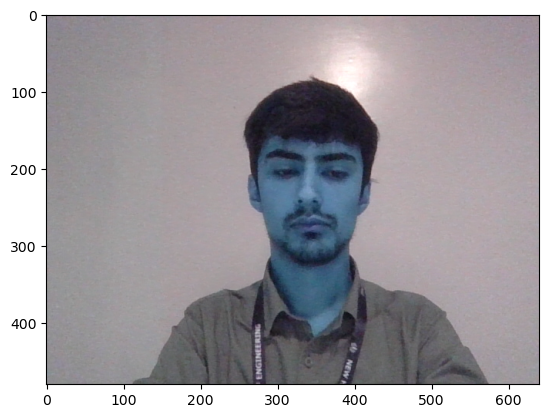

In [143]:
plt.imshow(frame)

# 3.EXTRACTING KEYPONT VALUES


In [9]:
 len(results.pose_landmarks.landmark)

33

In [144]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [145]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face= np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3) 
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [146]:
extract_keypoints(results).shape

(1662,)

# 4.FOLDERS FOR COLLECTIONS

In [147]:
#Path for exported data in numpy arrays
DATA_PATH = os.path.join('MP_DATA')
#Actions that will be detected
actions = np.array(['hello','thanks','iloveyou'])

#Data for videos
no_sequences = 30
#Videos will be 30 frames in length
sequence_length = 30

In [148]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

# 5.KEYPOINTS COLLECTION FOR TRAINING AND TESTING

In [15]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #Loop through the actions
    for action in actions:
        #Loop through the videos
        for sequence in range(no_sequences):
            #Loop through the sequence length
            for frame_num in range(sequence_length):

                #Reading the Feed from Webcam
                ret, frame = cap.read()
                
                #Detection
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                
                #Draw Landmarks
                draw_styled_landmarks(image, results)
                
                #Wait between collecting frames
                if frame_num == 0:
                    cv2.putText(image,'Starting Collection',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action, str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                
                #Showing to the user
                cv2.imshow('OpenCV Feed', image)
                
                #Breaking the loop
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# 6.PREPROCESSING, CREATING LABELS AND FEATURES

In [149]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [150]:
label_map = {label:num for num, label in enumerate(actions)}

In [151]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [152]:
sequences, labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH,action,str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [153]:
np.array(sequences).shape

(90, 30, 1662)

In [154]:
np.array(labels).shape

(90,)

In [155]:
X =np.array(sequences)

In [156]:
y = to_categorical(labels).astype(int)

In [157]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05)

In [158]:
X_train.shape

(85, 30, 1662)

# 7.BUILD AND TRAINING LSTM NN

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [160]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [161]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [162]:
res = [.7, 0.2, 0.1]

In [163]:
actions[np.argmax(res)]

'hello'

In [170]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [114]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 143ms/step - loss: 2.5386 - categorical_accuracy: 0.3412
Epoch 2/2000
3/3 [==============================] - 0s 137ms/step - loss: 7.4658 - categorical_accuracy: 0.3647
Epoch 3/2000
3/3 [==============================] - 0s 108ms/step - loss: 7.4516 - categorical_accuracy: 0.3647
Epoch 4/2000
3/3 [==============================] - 0s 112ms/step - loss: 2.9047 - categorical_accuracy: 0.3059
Epoch 5/2000
3/3 [==============================] - 0s 118ms/step - loss: 7.1630 - categorical_accuracy: 0.3882
Epoch 6/2000
3/3 [==============================] - 0s 126ms/step - loss: 11.3925 - categorical_accuracy: 0.3882
Epoch 7/2000
3/3 [==============================] - 1s 141ms/step - loss: 8.7270 - categorical_accuracy: 0.3294
Epoch 8/2000
3/3 [==============================] - 0s 109ms/step - loss: 16.7304 - categorical_accuracy: 0.2000
Epoch 9/2000
3/3 [==============================] - 0s 134ms/step - loss: 5.7635 - categorical_accurac

3/3 [==============================] - 0s 126ms/step - loss: 1.0169 - categorical_accuracy: 0.5529
Epoch 74/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.0385 - categorical_accuracy: 0.5176
Epoch 75/2000
3/3 [==============================] - 1s 135ms/step - loss: 1.2752 - categorical_accuracy: 0.3882
Epoch 76/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.2616 - categorical_accuracy: 0.4588
Epoch 77/2000
3/3 [==============================] - 1s 167ms/step - loss: 1.1757 - categorical_accuracy: 0.3765
Epoch 78/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.3100 - categorical_accuracy: 0.4471
Epoch 79/2000
3/3 [==============================] - 1s 170ms/step - loss: 1.1643 - categorical_accuracy: 0.4353
Epoch 80/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.1640 - categorical_accuracy: 0.4000
Epoch 81/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.0223 - categorical_accuracy: 0.47

3/3 [==============================] - 0s 153ms/step - loss: 0.9317 - categorical_accuracy: 0.6588
Epoch 146/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.9031 - categorical_accuracy: 0.4118
Epoch 147/2000
3/3 [==============================] - 0s 162ms/step - loss: 0.7423 - categorical_accuracy: 0.7059
Epoch 148/2000
3/3 [==============================] - 1s 185ms/step - loss: 0.7612 - categorical_accuracy: 0.6471
Epoch 149/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.7213 - categorical_accuracy: 0.6824
Epoch 150/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.6936 - categorical_accuracy: 0.6824
Epoch 151/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.6933 - categorical_accuracy: 0.7176
Epoch 152/2000
3/3 [==============================] - 1s 144ms/step - loss: 0.7577 - categorical_accuracy: 0.7294
Epoch 153/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.6831 - categorical_accura

Epoch 217/2000
3/3 [==============================] - 0s 151ms/step - loss: 1.0426 - categorical_accuracy: 0.3765
Epoch 218/2000
3/3 [==============================] - 0s 134ms/step - loss: 1.0390 - categorical_accuracy: 0.5059
Epoch 219/2000
3/3 [==============================] - 0s 156ms/step - loss: 0.9584 - categorical_accuracy: 0.4706
Epoch 220/2000
3/3 [==============================] - 0s 150ms/step - loss: 0.9738 - categorical_accuracy: 0.5294
Epoch 221/2000
3/3 [==============================] - 0s 139ms/step - loss: 0.9140 - categorical_accuracy: 0.5882
Epoch 222/2000
3/3 [==============================] - 0s 152ms/step - loss: 0.9480 - categorical_accuracy: 0.4941
Epoch 223/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.9488 - categorical_accuracy: 0.5647
Epoch 224/2000
3/3 [==============================] - 0s 151ms/step - loss: 0.9002 - categorical_accuracy: 0.6471
Epoch 225/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.9525 - cat

3/3 [==============================] - 0s 143ms/step - loss: 0.7854 - categorical_accuracy: 0.6471
Epoch 289/2000
3/3 [==============================] - 0s 158ms/step - loss: 0.8602 - categorical_accuracy: 0.6706
Epoch 290/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.6456 - categorical_accuracy: 0.7647
Epoch 291/2000
3/3 [==============================] - 0s 150ms/step - loss: 0.7949 - categorical_accuracy: 0.6471
Epoch 292/2000
3/3 [==============================] - 1s 183ms/step - loss: 0.8294 - categorical_accuracy: 0.5882
Epoch 293/2000
3/3 [==============================] - 0s 159ms/step - loss: 0.7667 - categorical_accuracy: 0.6235
Epoch 294/2000
3/3 [==============================] - 0s 151ms/step - loss: 0.7448 - categorical_accuracy: 0.6706
Epoch 295/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.6986 - categorical_accuracy: 0.6706
Epoch 296/2000
3/3 [==============================] - 0s 147ms/step - loss: 0.6903 - categorical_accura

3/3 [==============================] - 0s 135ms/step - loss: 1.8876 - categorical_accuracy: 0.3765
Epoch 361/2000
3/3 [==============================] - 1s 147ms/step - loss: 1.3406 - categorical_accuracy: 0.4588
Epoch 362/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.9957 - categorical_accuracy: 0.5647
Epoch 363/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.9819 - categorical_accuracy: 0.6471
Epoch 364/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.9443 - categorical_accuracy: 0.6588
Epoch 365/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.9321 - categorical_accuracy: 0.5412
Epoch 366/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.8216 - categorical_accuracy: 0.6471
Epoch 367/2000
3/3 [==============================] - 1s 141ms/step - loss: 0.7642 - categorical_accuracy: 0.6235
Epoch 368/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.8469 - categorical_accura

3/3 [==============================] - 0s 129ms/step - loss: 3137.9424 - categorical_accuracy: 0.4235
Epoch 432/2000
3/3 [==============================] - 0s 133ms/step - loss: 470.1769 - categorical_accuracy: 0.2353
Epoch 433/2000
3/3 [==============================] - 0s 131ms/step - loss: 448.8873 - categorical_accuracy: 0.3529
Epoch 434/2000
3/3 [==============================] - 1s 136ms/step - loss: 550.2072 - categorical_accuracy: 0.3647
Epoch 435/2000
3/3 [==============================] - 0s 138ms/step - loss: 196.9959 - categorical_accuracy: 0.4118
Epoch 436/2000
3/3 [==============================] - 0s 115ms/step - loss: 190.6984 - categorical_accuracy: 0.3529
Epoch 437/2000
3/3 [==============================] - 0s 123ms/step - loss: 88.4108 - categorical_accuracy: 0.3529
Epoch 438/2000
3/3 [==============================] - 1s 172ms/step - loss: 93.2401 - categorical_accuracy: 0.3412
Epoch 439/2000
3/3 [==============================] - 0s 140ms/step - loss: 47.9110 - ca

3/3 [==============================] - 0s 132ms/step - loss: 1.3138 - categorical_accuracy: 0.4353
Epoch 503/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.1399 - categorical_accuracy: 0.2118
Epoch 504/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.2400 - categorical_accuracy: 0.5059
Epoch 505/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.5089 - categorical_accuracy: 0.3294
Epoch 506/2000
3/3 [==============================] - 0s 133ms/step - loss: 1.3837 - categorical_accuracy: 0.4353
Epoch 507/2000
3/3 [==============================] - 0s 126ms/step - loss: 1.3369 - categorical_accuracy: 0.3176
Epoch 508/2000
3/3 [==============================] - 0s 134ms/step - loss: 1.2289 - categorical_accuracy: 0.4000
Epoch 509/2000
3/3 [==============================] - 0s 129ms/step - loss: 1.2173 - categorical_accuracy: 0.2235
Epoch 510/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.3216 - categorical_accura

Epoch 574/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.0087 - categorical_accuracy: 0.1882
Epoch 575/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.0737 - categorical_accuracy: 0.3412
Epoch 576/2000
3/3 [==============================] - 0s 134ms/step - loss: 1.0560 - categorical_accuracy: 0.5059
Epoch 577/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0965 - categorical_accuracy: 0.3059
Epoch 578/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.0418 - categorical_accuracy: 0.5882
Epoch 579/2000
3/3 [==============================] - 0s 133ms/step - loss: 1.0574 - categorical_accuracy: 0.2588
Epoch 580/2000
3/3 [==============================] - 0s 133ms/step - loss: 1.0951 - categorical_accuracy: 0.5176
Epoch 581/2000
3/3 [==============================] - 0s 134ms/step - loss: 1.0336 - categorical_accuracy: 0.3294
Epoch 582/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.0588 - cate

3/3 [==============================] - 0s 134ms/step - loss: 0.9390 - categorical_accuracy: 0.5059
Epoch 646/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.9603 - categorical_accuracy: 0.4588
Epoch 647/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.9205 - categorical_accuracy: 0.5294
Epoch 648/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.9088 - categorical_accuracy: 0.5059
Epoch 649/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.8808 - categorical_accuracy: 0.4353
Epoch 650/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.9367 - categorical_accuracy: 0.3882
Epoch 651/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.8680 - categorical_accuracy: 0.5412
Epoch 652/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.8764 - categorical_accuracy: 0.4235
Epoch 653/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.9163 - categorical_accura

Epoch 717/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.7986 - categorical_accuracy: 0.5882
Epoch 718/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.7898 - categorical_accuracy: 0.6824
Epoch 719/2000
3/3 [==============================] - 0s 150ms/step - loss: 0.8621 - categorical_accuracy: 0.4353
Epoch 720/2000
3/3 [==============================] - 0s 145ms/step - loss: 0.8929 - categorical_accuracy: 0.6471
Epoch 721/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.9882 - categorical_accuracy: 0.4118
Epoch 722/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.9459 - categorical_accuracy: 0.5059
Epoch 723/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.8848 - categorical_accuracy: 0.5882
Epoch 724/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.8453 - categorical_accuracy: 0.4353
Epoch 725/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.8654 - cat

3/3 [==============================] - 0s 123ms/step - loss: 1.0320 - categorical_accuracy: 0.3412
Epoch 789/2000
3/3 [==============================] - 0s 159ms/step - loss: 0.9938 - categorical_accuracy: 0.4588
Epoch 790/2000
3/3 [==============================] - 0s 156ms/step - loss: 0.9729 - categorical_accuracy: 0.5529
Epoch 791/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.9761 - categorical_accuracy: 0.4824
Epoch 792/2000
3/3 [==============================] - 0s 174ms/step - loss: 0.8869 - categorical_accuracy: 0.4941
Epoch 793/2000
3/3 [==============================] - 1s 181ms/step - loss: 0.8899 - categorical_accuracy: 0.5412
Epoch 794/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.1538 - categorical_accuracy: 0.4824
Epoch 795/2000
3/3 [==============================] - 0s 150ms/step - loss: 0.8333 - categorical_accuracy: 0.5412
Epoch 796/2000
3/3 [==============================] - 1s 177ms/step - loss: 0.8160 - categorical_accura

Epoch 860/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.7259 - categorical_accuracy: 0.7294
Epoch 861/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.7273 - categorical_accuracy: 0.7529
Epoch 862/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.8123 - categorical_accuracy: 0.5059
Epoch 863/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.8162 - categorical_accuracy: 0.5647
Epoch 864/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.9446 - categorical_accuracy: 0.5176
Epoch 865/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.9508 - categorical_accuracy: 0.5176
Epoch 866/2000
3/3 [==============================] - 0s 139ms/step - loss: 1.0677 - categorical_accuracy: 0.4824
Epoch 867/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.8440 - categorical_accuracy: 0.5059
Epoch 868/2000
3/3 [==============================] - 0s 141ms/step - loss: 0.9374 - cat

3/3 [==============================] - 0s 134ms/step - loss: 0.7691 - categorical_accuracy: 0.6235
Epoch 932/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.7702 - categorical_accuracy: 0.6353
Epoch 933/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.7529 - categorical_accuracy: 0.7059
Epoch 934/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.7429 - categorical_accuracy: 0.6471
Epoch 935/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.7474 - categorical_accuracy: 0.6588
Epoch 936/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.7404 - categorical_accuracy: 0.7059
Epoch 937/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.7759 - categorical_accuracy: 0.6235
Epoch 938/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.9197 - categorical_accuracy: 0.4941
Epoch 939/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.9549 - categorical_accura

Epoch 1003/2000
3/3 [==============================] - 0s 129ms/step - loss: 1.4204 - categorical_accuracy: 0.3059
Epoch 1004/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.5403 - categorical_accuracy: 0.5176
Epoch 1005/2000
3/3 [==============================] - 0s 125ms/step - loss: 2.1961 - categorical_accuracy: 0.2588
Epoch 1006/2000
3/3 [==============================] - 0s 128ms/step - loss: 1.9172 - categorical_accuracy: 0.4588
Epoch 1007/2000
3/3 [==============================] - 0s 123ms/step - loss: 2.0017 - categorical_accuracy: 0.4118
Epoch 1008/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.4161 - categorical_accuracy: 0.5059
Epoch 1009/2000
3/3 [==============================] - 0s 134ms/step - loss: 1.3286 - categorical_accuracy: 0.5176
Epoch 1010/2000
3/3 [==============================] - 0s 134ms/step - loss: 1.6628 - categorical_accuracy: 0.3765
Epoch 1011/2000
3/3 [==============================] - 0s 140ms/step - loss: 1.2

3/3 [==============================] - 0s 135ms/step - loss: 0.8517 - categorical_accuracy: 0.6941
Epoch 1075/2000
3/3 [==============================] - 1s 128ms/step - loss: 0.7899 - categorical_accuracy: 0.6706
Epoch 1076/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.7008 - categorical_accuracy: 0.6588
Epoch 1077/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.7758 - categorical_accuracy: 0.7059
Epoch 1078/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.6648 - categorical_accuracy: 0.7412
Epoch 1079/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.7245 - categorical_accuracy: 0.5882
Epoch 1080/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.8986 - categorical_accuracy: 0.7176
Epoch 1081/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.8877 - categorical_accuracy: 0.4824
Epoch 1082/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.8454 - categorica

3/3 [==============================] - 0s 124ms/step - loss: 0.6604 - categorical_accuracy: 0.7529
Epoch 1146/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.6504 - categorical_accuracy: 0.7882
Epoch 1147/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.6738 - categorical_accuracy: 0.8471
Epoch 1148/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.7645 - categorical_accuracy: 0.6235
Epoch 1149/2000
3/3 [==============================] - 1s 141ms/step - loss: 0.8175 - categorical_accuracy: 0.5529
Epoch 1150/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.7444 - categorical_accuracy: 0.6471
Epoch 1151/2000
3/3 [==============================] - 1s 142ms/step - loss: 0.6876 - categorical_accuracy: 0.6471
Epoch 1152/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.6833 - categorical_accuracy: 0.7765
Epoch 1153/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.6344 - categorica

3/3 [==============================] - 0s 132ms/step - loss: 0.8330 - categorical_accuracy: 0.6941
Epoch 1217/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.8225 - categorical_accuracy: 0.6471
Epoch 1218/2000
3/3 [==============================] - 1s 143ms/step - loss: 0.5639 - categorical_accuracy: 0.8118
Epoch 1219/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.5952 - categorical_accuracy: 0.6118
Epoch 1220/2000
3/3 [==============================] - 1s 144ms/step - loss: 0.5532 - categorical_accuracy: 0.8824
Epoch 1221/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.6615 - categorical_accuracy: 0.5882
Epoch 1222/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.5811 - categorical_accuracy: 0.8118
Epoch 1223/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.7101 - categorical_accuracy: 0.6353
Epoch 1224/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.6122 - categorica

3/3 [==============================] - 0s 131ms/step - loss: 0.4860 - categorical_accuracy: 0.8706
Epoch 1288/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.4645 - categorical_accuracy: 0.8471
Epoch 1289/2000
3/3 [==============================] - 1s 141ms/step - loss: 0.5168 - categorical_accuracy: 0.7882
Epoch 1290/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.4903 - categorical_accuracy: 0.8471
Epoch 1291/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.4219 - categorical_accuracy: 0.9412
Epoch 1292/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.4430 - categorical_accuracy: 0.8824
Epoch 1293/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.5692 - categorical_accuracy: 0.8118
Epoch 1294/2000
3/3 [==============================] - 1s 142ms/step - loss: 0.8218 - categorical_accuracy: 0.6353
Epoch 1295/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.1548 - categorica

3/3 [==============================] - 0s 140ms/step - loss: 0.3467 - categorical_accuracy: 0.9412
Epoch 1359/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.3075 - categorical_accuracy: 0.9765
Epoch 1360/2000
3/3 [==============================] - 0s 141ms/step - loss: 0.2869 - categorical_accuracy: 0.9765
Epoch 1361/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.2876 - categorical_accuracy: 0.9647
Epoch 1362/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.2784 - categorical_accuracy: 0.9765
Epoch 1363/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.2760 - categorical_accuracy: 0.9765
Epoch 1364/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.2690 - categorical_accuracy: 0.9765
Epoch 1365/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.2706 - categorical_accuracy: 0.9765
Epoch 1366/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.2730 - categorica

3/3 [==============================] - 0s 127ms/step - loss: 0.3214 - categorical_accuracy: 0.9412
Epoch 1430/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.4090 - categorical_accuracy: 0.9059
Epoch 1431/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.3878 - categorical_accuracy: 0.9176
Epoch 1432/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.3975 - categorical_accuracy: 0.9059
Epoch 1433/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.3919 - categorical_accuracy: 0.9294
Epoch 1434/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.3877 - categorical_accuracy: 0.9059
Epoch 1435/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.3814 - categorical_accuracy: 0.9294
Epoch 1436/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.3600 - categorical_accuracy: 0.9294
Epoch 1437/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.3417 - categorica

3/3 [==============================] - 0s 97ms/step - loss: 0.2600 - categorical_accuracy: 0.9529
Epoch 1501/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.3205 - categorical_accuracy: 0.9059
Epoch 1502/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.3006 - categorical_accuracy: 0.9176
Epoch 1503/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.2712 - categorical_accuracy: 0.9412
Epoch 1504/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.2121 - categorical_accuracy: 0.9412
Epoch 1505/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.2131 - categorical_accuracy: 0.9647
Epoch 1506/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.2169 - categorical_accuracy: 0.9529
Epoch 1507/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.2187 - categorical_accuracy: 0.9412
Epoch 1508/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.2217 - categorical_accura

3/3 [==============================] - 0s 88ms/step - loss: 1.2870 - categorical_accuracy: 0.3412
Epoch 1572/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.4078 - categorical_accuracy: 0.4235
Epoch 1573/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.1613 - categorical_accuracy: 0.5882
Epoch 1574/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1029 - categorical_accuracy: 0.5412
Epoch 1575/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.8993 - categorical_accuracy: 0.7176
Epoch 1576/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.7845 - categorical_accuracy: 0.8471
Epoch 1577/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.7482 - categorical_accuracy: 0.7882
Epoch 1578/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.7095 - categorical_accuracy: 0.8353
Epoch 1579/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.6809 - categorical_accura

Epoch 1643/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.3030 - categorical_accuracy: 0.9647
Epoch 1644/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.3093 - categorical_accuracy: 0.9647
Epoch 1645/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.3023 - categorical_accuracy: 0.9294
Epoch 1646/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.3973 - categorical_accuracy: 0.8824
Epoch 1647/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.3452 - categorical_accuracy: 0.9529
Epoch 1648/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.3285 - categorical_accuracy: 0.9294
Epoch 1649/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.3841 - categorical_accuracy: 0.8706
Epoch 1650/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.3819 - categorical_accuracy: 0.8706
Epoch 1651/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.3234 - ca

3/3 [==============================] - 0s 100ms/step - loss: 0.6437 - categorical_accuracy: 0.6235
Epoch 1715/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.5522 - categorical_accuracy: 0.7529
Epoch 1716/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.5892 - categorical_accuracy: 0.6941
Epoch 1717/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.6567 - categorical_accuracy: 0.6118
Epoch 1718/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.6012 - categorical_accuracy: 0.6353
Epoch 1719/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.5838 - categorical_accuracy: 0.7647
Epoch 1720/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.5669 - categorical_accuracy: 0.7176
Epoch 1721/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.5967 - categorical_accuracy: 0.8235
Epoch 1722/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.5541 - categorical_accura

3/3 [==============================] - 0s 102ms/step - loss: 0.3332 - categorical_accuracy: 0.8706
Epoch 1786/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.4114 - categorical_accuracy: 0.9059
Epoch 1787/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.4390 - categorical_accuracy: 0.8118
Epoch 1788/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.5554 - categorical_accuracy: 0.8118
Epoch 1789/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.4875 - categorical_accuracy: 0.7647
Epoch 1790/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.9878 - categorical_accuracy: 0.5294
Epoch 1791/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.7499 - categorical_accuracy: 0.7294
Epoch 1792/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.6998 - categorical_accuracy: 0.6824
Epoch 1793/2000
3/3 [==============================] - 0s 151ms/step - loss: 0.5346 - categorical

3/3 [==============================] - 0s 106ms/step - loss: 0.4253 - categorical_accuracy: 0.7765
Epoch 1857/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.3560 - categorical_accuracy: 0.8706
Epoch 1858/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.3025 - categorical_accuracy: 0.9529
Epoch 1859/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.2346 - categorical_accuracy: 0.9765
Epoch 1860/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.2421 - categorical_accuracy: 0.9529
Epoch 1861/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.2134 - categorical_accuracy: 0.9647
Epoch 1862/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.2131 - categorical_accuracy: 0.9647
Epoch 1863/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.2451 - categorical_accuracy: 0.9412
Epoch 1864/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.2559 - categorical_acc

3/3 [==============================] - 0s 89ms/step - loss: 0.2223 - categorical_accuracy: 0.9294
Epoch 1928/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.2221 - categorical_accuracy: 0.9647
Epoch 1929/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.2238 - categorical_accuracy: 0.9529
Epoch 1930/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.1704 - categorical_accuracy: 0.9765
Epoch 1931/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.1587 - categorical_accuracy: 0.9765
Epoch 1932/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.1702 - categorical_accuracy: 0.9765
Epoch 1933/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.1417 - categorical_accuracy: 0.9765
Epoch 1934/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.1738 - categorical_accuracy: 0.9412
Epoch 1935/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.1826 - categorical_accura

Epoch 1999/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.1485 - categorical_accuracy: 0.9647
Epoch 2000/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.1377 - categorical_accuracy: 0.9647


In [164]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

# 8.MAKING PREDICTIONS

In [165]:
res=model.predict(X_test)

1/1 [==============================] - 0s 366ms/step


In [171]:
np.sum(res[0])

1.0

In [172]:
actions[np.argmax(res[1])]


'thanks'

In [173]:
actions[y_test[0]]

array(['hello', 'thanks', 'hello'], dtype='<U8')

# 9.SAVING WEIGHTS

In [174]:

model.save('action.h5')

# 10.CONFUSION MATRIX AND ACCURACY


In [175]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [176]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 357ms/step


In [177]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [178]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 0],
        [4, 0]],

       [[0, 4],
        [0, 1]]], dtype=int64)

In [179]:
accuracy_score(ytrue, yhat)

0.2

# 11.REAL TIME TESTING

In [180]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

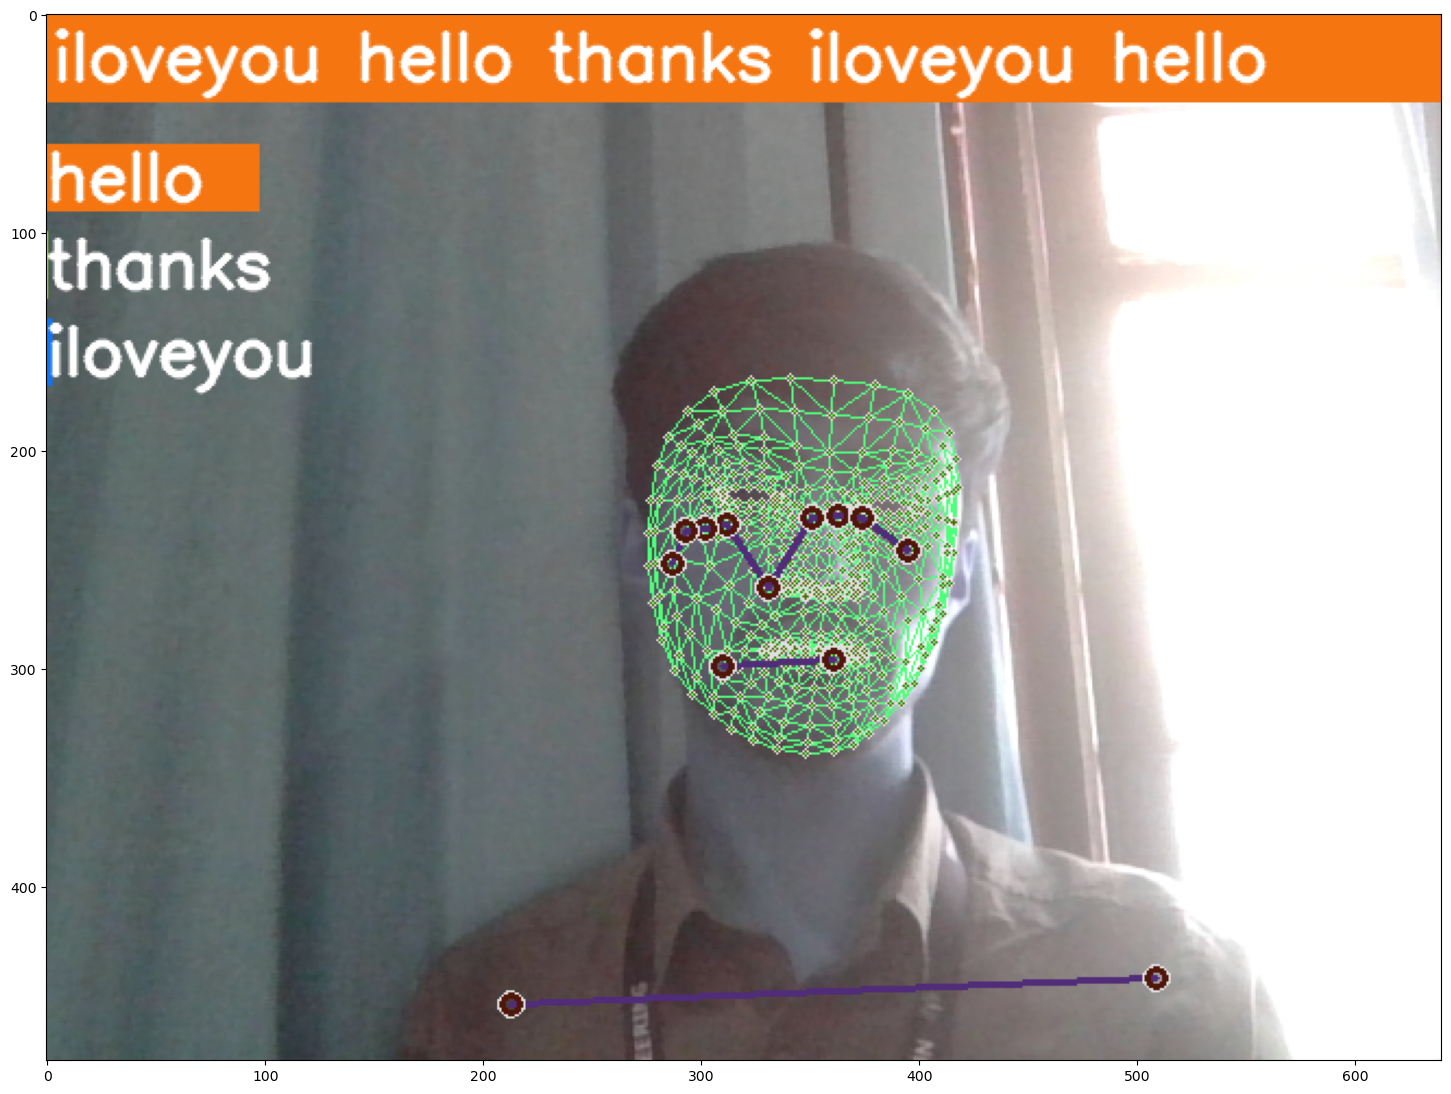

In [77]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [181]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [88]:
cap.release()
cv2.destroyAllWindows()

In [89]:
res[np.argmax(res)] > threshold

True

In [105]:
(no_sequences,30,1662)

(30, 30, 1662)

In [96]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 31ms/step


array([[0.04230728, 0.13332479, 0.82436794]], dtype=float32)